# Neural Network Training 

In [11]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

# Build Model

In [13]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [8]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      


                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

# verbose 매개변수는 훈련 과정 출력을 조절한다. 기본 값은 1로 epoch마다 진행 막대와 함께 손실 등의 지표가 출력된다. 0은 훈련 과정을 보여주지 않는다.

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3325 - accuracy: 0.8808
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3171 - accuracy: 0.8861
Epoch 3/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3048 - accuracy: 0.8917
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2981 - accuracy: 0.8953
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2909 - accuracy: 0.8988


In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


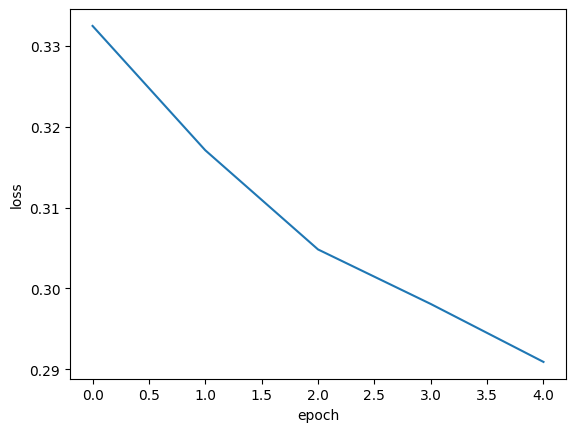

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

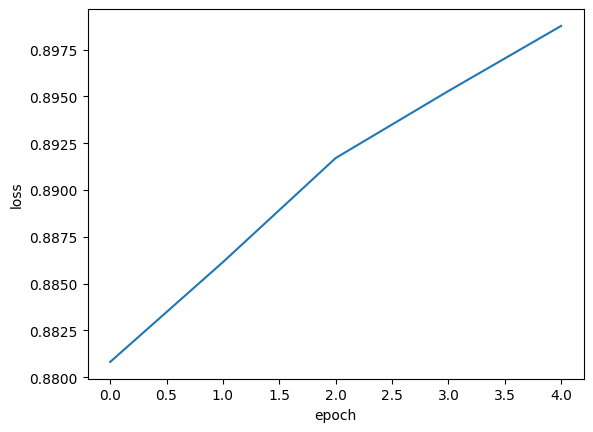

In [22]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5338 - accuracy: 0.8111
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3937 - accuracy: 0.8589
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3569 - accuracy: 0.8726
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3354 - accuracy: 0.8801
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3200 - accuracy: 0.8857
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3108 - accuracy: 0.8891
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3002 - accuracy: 0.8928
Epoch 8/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2932 - accuracy: 0.8954
Epoch 9/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2827 - accuracy: 0.9003
Epoch 10/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.278

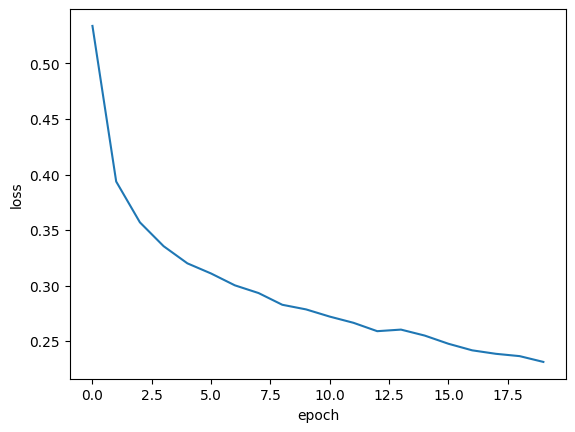

In [26]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


# Validation Loss

* 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실함수이다. 이따금 손실 감소에 비례하여 정확도가 높아지지 않는 겨우도 있습니다. 따라서 모델이 잘 훈련되었는지 판단하려면 정확도 보다는 손실 함수의 값을 확인하는 것이 더 낫다.

In [27]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5331 - accuracy: 0.8123 - val_loss: 0.4285 - val_accuracy: 0.8449
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3931 - accuracy: 0.8589 - val_loss: 0.3782 - val_accuracy: 0.8640
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3551 - accuracy: 0.8728 - val_loss: 0.3736 - val_accuracy: 0.8723
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3357 - accuracy: 0.8802 - val_loss: 0.3887 - val_accuracy: 0.8637
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3201 - accuracy: 0.8851 - val_loss: 0.3963 - val_accuracy: 0.8664
Epoch 6/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3065 - accuracy: 0.8903 - val_loss: 0.3658 - val_accuracy: 0.8779
Epoch 7/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2980 - accuracy: 0.8951 - val_loss: 0.4008 - val_accurac

In [28]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


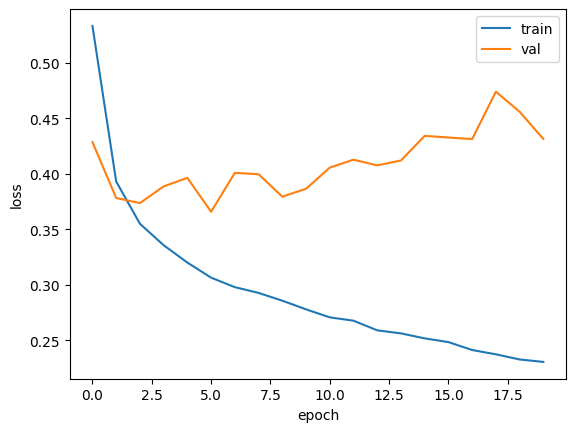

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Overfitting

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5231 - accuracy: 0.8174 - val_loss: 0.4542 - val_accuracy: 0.8414
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3981 - accuracy: 0.8570 - val_loss: 0.4108 - val_accuracy: 0.8547
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3558 - accuracy: 0.8721 - val_loss: 0.3574 - val_accuracy: 0.8711
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3278 - accuracy: 0.8801 - val_loss: 0.3337 - val_accuracy: 0.8763
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3095 - accuracy: 0.8867 - val_loss: 0.3415 - val_accuracy: 0.8776
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2915 - accuracy: 0.8923 - val_loss: 0.3574 - val_accuracy: 0.8672
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2807 - accuracy: 0.8960 - val_loss: 0.3472 - val_accuracy:

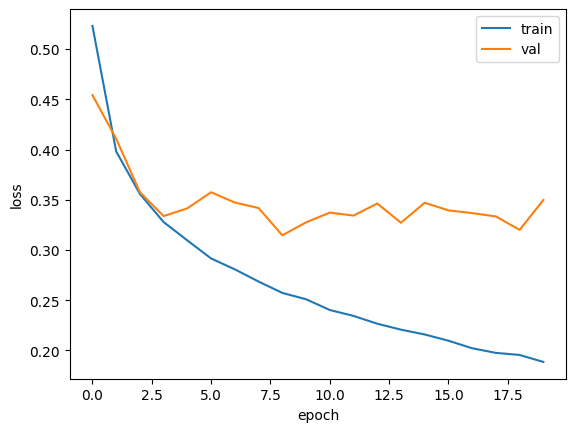

In [30]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Dropout

In [31]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5902 - accuracy: 0.7925 - val_loss: 0.4518 - val_accuracy: 0.8343
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4403 - accuracy: 0.8406 - val_loss: 0.3859 - val_accuracy: 0.8592
Epoch 3/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4060 - accuracy: 0.8516 - val_loss: 0.3740 - val_accuracy: 0.8630
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3849 - accuracy: 0.8588 - val_loss: 0.3522 - val_accuracy: 0.8692
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3695 - accuracy: 0.8646 - val_loss: 0.3587 - val_accuracy: 0.8673
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3570 - accuracy: 0.8689 - val_loss: 0.3528 - val_accuracy: 0.8722
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3448 - accuracy: 0.8719 - val_loss: 0.3395 - val_accuracy:

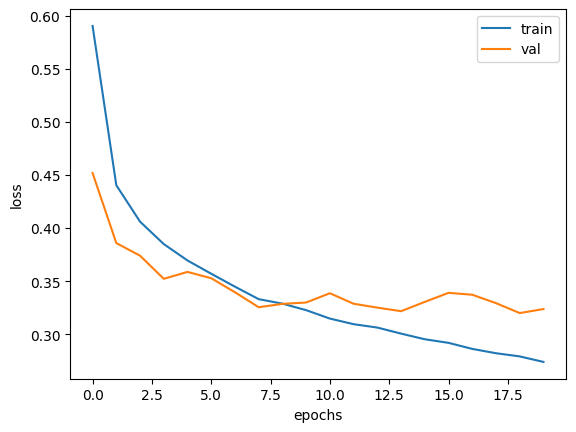

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


# Model Save and resume

In [33]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=1, validation_data=(val_scaled, val_target))

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5925 - accuracy: 0.7918 - val_loss: 0.4426 - val_accuracy: 0.8389
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4358 - accuracy: 0.8453 - val_loss: 0.3792 - val_accuracy: 0.8575
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4016 - accuracy: 0.8556 - val_loss: 0.3654 - val_accuracy: 0.8643
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3792 - accuracy: 0.8630 - val_loss: 0.3496 - val_accuracy: 0.8733
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3647 - accuracy: 0.8664 - val_loss: 0.3491 - val_accuracy: 0.8714
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3531 - accuracy: 0.8713 - val_loss: 0.3560 - val_accuracy: 0.8655
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3444 - accuracy: 0.8728 - val_loss: 0.3538 - val_accuracy:

In [34]:
model.save_weights('model-weights.h5')

In [35]:
model.save('model-whole.h5')

In [36]:
!ls -al *.h5

-rwxrwxrwx 1 jisoo jisoo 333320 Dec 21  2023 model-weights.h5
-rwxrwxrwx 1 jisoo jisoo 982480 Dec 21  2023 model-whole.h5


In [44]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

# Callback

In [47]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=1,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6015 - accuracy: 0.7882 - val_loss: 0.4480 - val_accuracy: 0.8350
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4469 - accuracy: 0.8407 - val_loss: 0.4132 - val_accuracy: 0.8543
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4112 - accuracy: 0.8507 - val_loss: 0.3765 - val_accuracy: 0.8618
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3855 - accuracy: 0.8604 - val_loss: 0.3566 - val_accuracy: 0.8687
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3736 - accuracy: 0.8633 - val_loss: 0.3587 - val_accuracy: 0.8694
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3574 - accuracy: 0.8694 - val_loss: 0.3365 - val_accuracy: 0.8770
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3484 - accuracy: 0.8730 - val_loss: 0.3340 - val_accuracy:

In [48]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3158 - accuracy: 0.8883


[0.31580790877342224, 0.8883333206176758]

# Early stopping

In [49]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5932 - accuracy: 0.7908 - val_loss: 0.4342 - val_accuracy: 0.8415
Epoch 2/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4398 - accuracy: 0.8410 - val_loss: 0.3913 - val_accuracy: 0.8594
Epoch 3/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4045 - accuracy: 0.8527 - val_loss: 0.3689 - val_accuracy: 0.8637
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3830 - accuracy: 0.8612 - val_loss: 0.3629 - val_accuracy: 0.8659
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3687 - accuracy: 0.8654 - val_loss: 0.3503 - val_accuracy: 0.8738
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3540 - accuracy: 0.8721 - val_loss: 0.3526 - val_accuracy: 0.8704
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3418 - accuracy: 0.8744 - val_loss: 0.3453 - val_accuracy:

In [50]:
print(early_stopping_cb.stopped_epoch)

11


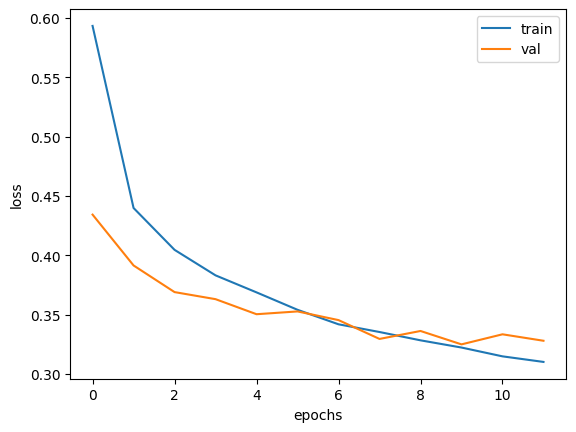

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [52]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.3248 - accuracy: 0.8844


[0.32484695315361023, 0.8844166398048401]